### Perkenalan

Nama: Sivi Almanaf Ali Shahab

Batch: 006

**Problem Statement**

Kita ingin mengelompokkan Life Expentancy pada setiap Benua yang dengan peringkat negara, dan score Overall Life. Sehingga kita bisa mememetakan benua mana yang dikategorikan life expentancy paling tinggi hingga paling rendah 

**Info dataset**

This dataset contains 6 columns and 223 Rows. Each row corresponds to a country in order of their life expectancy rank. The dataset has three numeric columns, Overall Life Expectancy, Male Life Expectancy and Female Life Expectancy.
The last column is Continent, which defines which continent that country lies in. This could be very well used as a class for the data.

This data can be used for classification by various techniques like SVM(linear), KNN, C.45 etc. and other supervised and unsupervised techniques.


### Import pustaka yang dibutuhkan

In [124]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples, classification_report, plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
PALETTE = sns.color_palette("Set2")

### Data Loading

In [125]:
data = pd.read_csv('./data/Life_expectancy_dataset.csv', encoding='latin1')
data.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [126]:
data.describe()

,Rank,Overall Life,Male Life,Female Life
count,223.000000,223.000000,223.000000,223.000000
mean,112.000000,72.487892,70.041704,75.019283
std,64.518731,8.459335,8.074942,8.986633
min,1.000000,50.200000,48.600000,51.000000
25%,56.500000,67.450000,64.500000,69.750000
50%,112.000000,74.900000,72.200000,77.900000
75%,167.500000,78.600000,75.850000,81.600000
max,223.000000,89.500000,85.600000,93.500000


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [128]:
data.isnull().sum()

Rank            0
Country         0
Overall Life    0
Male Life       0
Female Life     0
Continent       0
dtype: int64

### Data Cleaning

##### Identify Outlier

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

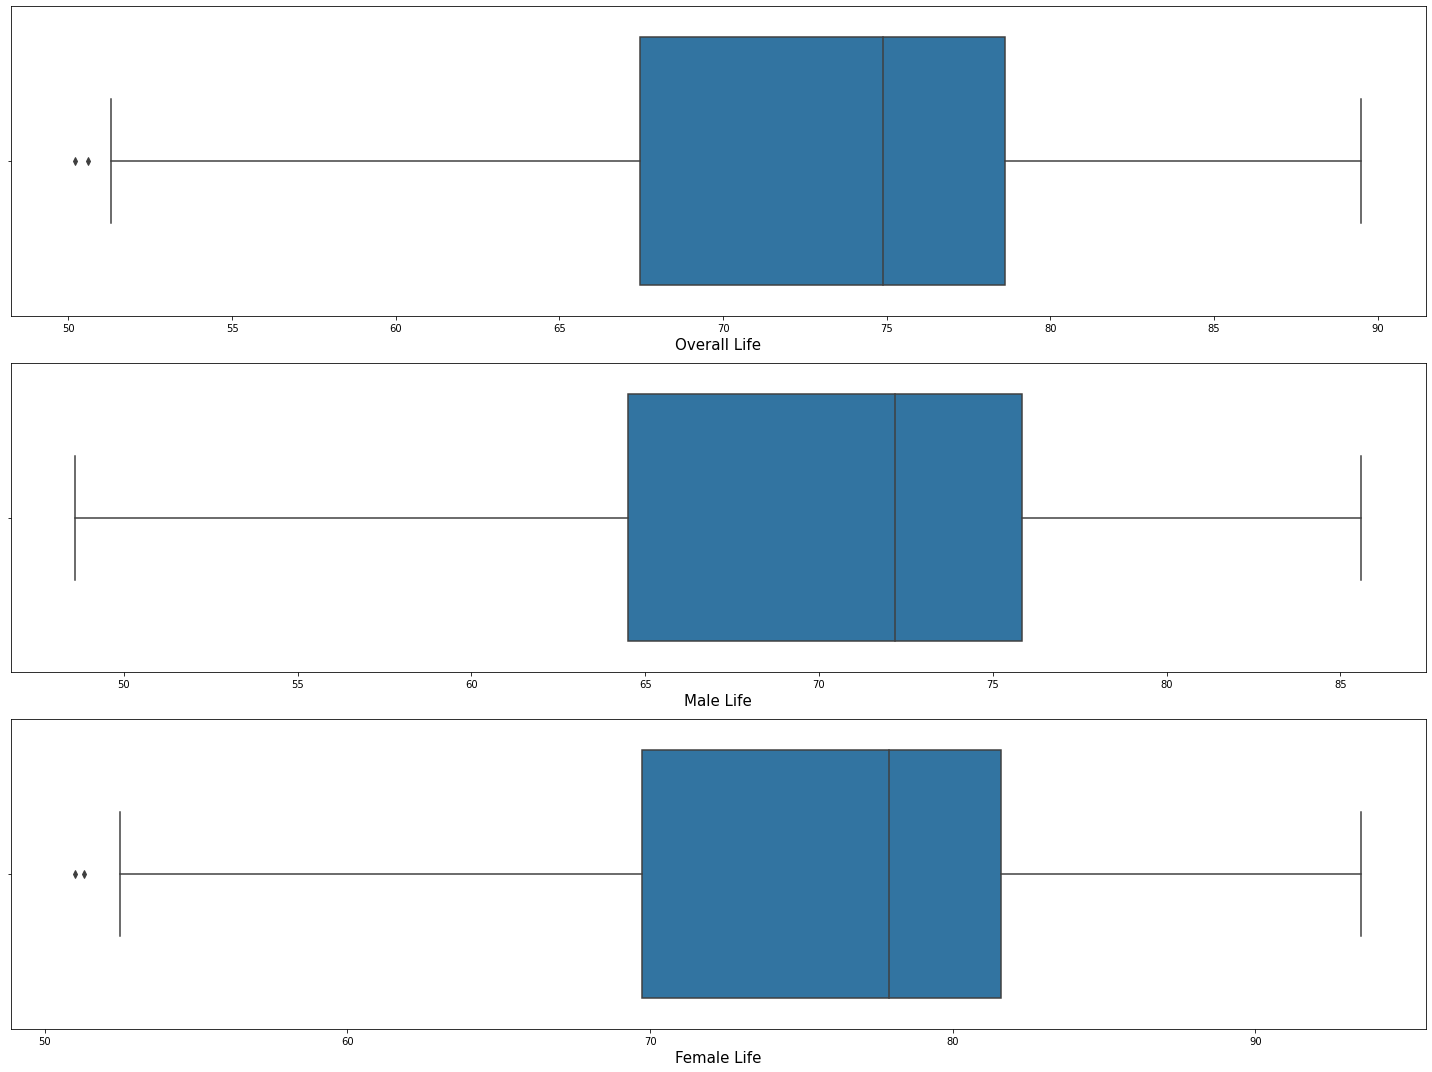

In [129]:
names = data[['Overall Life', 'Male Life', 'Female Life']]

plt.figure(figsize = (20, 15))
plotnumber = 1
for column in names:
    if plotnumber <= 3:
        ax = plt.subplot(3, 1, plotnumber)
        sns.boxplot(names[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Terdapat Outlier pada Overal Live dan Female Live

Melihat jumlah Outlier dengan fungsi outlier

In [130]:
from numpy import percentile
# fungsi outlier
def outliers(data):
    cols = data.columns
    for i in cols:
        #print(i)
        # calculate interquartile range
        q25, q75 = percentile(data[i], 25), percentile(data[i], 75)
        iqr = q75 - q25
        print('Percentiles:',i, '25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        # identify outliers
        outliers = [x for x in data[i] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))

In [131]:
outliers(names)

Percentiles: Overall Life 25th=67.450, 75th=78.600, IQR=11.150
Identified outliers: 2
Percentiles: Male Life 25th=64.500, 75th=75.850, IQR=11.350
Identified outliers: 0
Percentiles: Female Life 25th=69.750, 75th=81.600, IQR=11.850
Identified outliers: 2


In [132]:
df = data.copy()

In [133]:
# Remove outlier pada Overall Life
#['Overall Life', 'Male Life', 'Female Life']
q25, q75 = percentile(df['Overall Life'], 25), percentile(df['Overall Life'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outlier_overall_life = df[df['Overall Life'] < lower]
outlier_overall_life

,Rank,Country,Overall Life,Male Life,Female Life,Continent
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa
222,223,Chad,50.2,49.0,51.3,Africa


In [134]:
q25, q75 = percentile(df['Female Life'], 25), percentile(df['Female Life'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outlier_female_life = df[df['Female Life'] < lower]
outlier_female_life

,Rank,Country,Overall Life,Male Life,Female Life,Continent
219,220,Swaziland,51.6,52.2,51.0,Africa
222,223,Chad,50.2,49.0,51.3,Africa


##### Drop Outlier

In [135]:
df.drop(outlier_overall_life.index, inplace=True)

In [136]:
df.drop(index=219, inplace=True)

In [137]:
data.shape

(223, 6)

In [138]:
df.shape

(220, 6)

### Eksplorasi Data

In [139]:
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


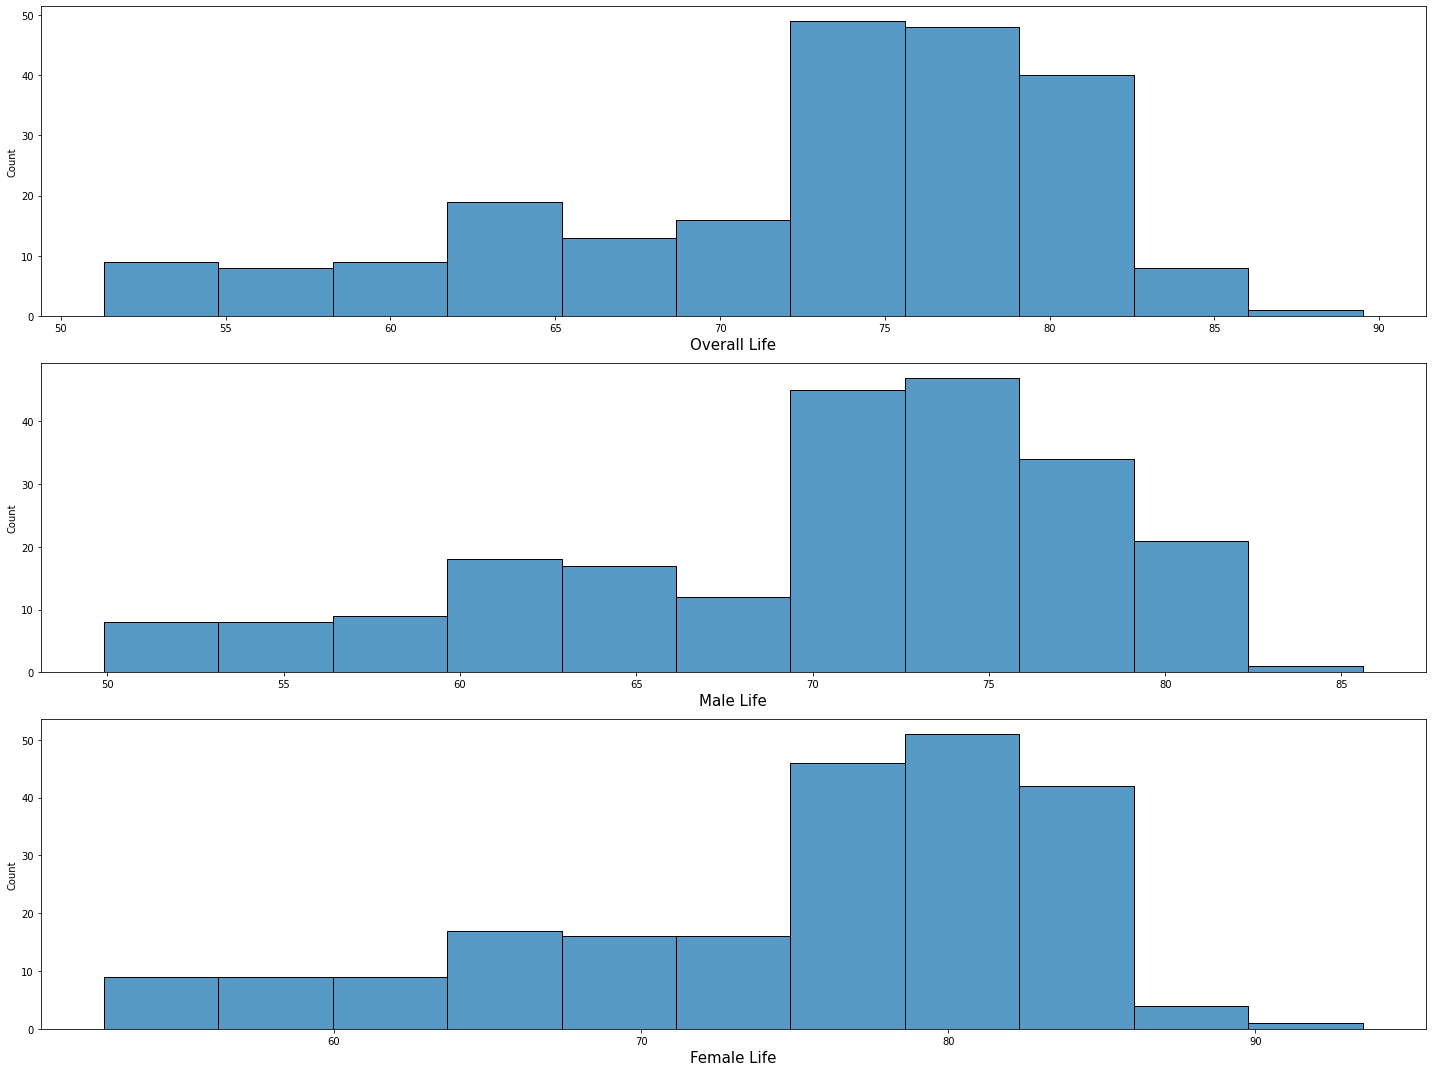

In [140]:
# Check distribution data
columns = df[['Overall Life', 'Male Life', 'Female Life']]
# Boxplot untuk mengetahui outlier dan distribusi data
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in columns:
    if plotnumber <= 3:
        ax = plt.subplot(3, 1, plotnumber)
        sns.histplot(columns[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Distribusi data dari data Numerik skewnesss

Text(0.5, 1.0, 'Correlation Heatmap')

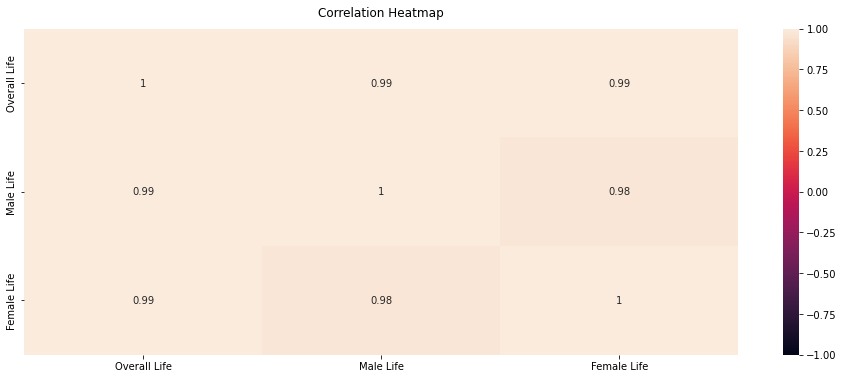

In [141]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(columns.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Dari Correlation data numerik diatas masing-masing features memiliki korelasi yang tinggi, sehingga dimungkingkan kita bisa menggunakan PCA untuk mereduksi dimensinya

<AxesSubplot:xlabel='Continent', ylabel='Overall Life'>

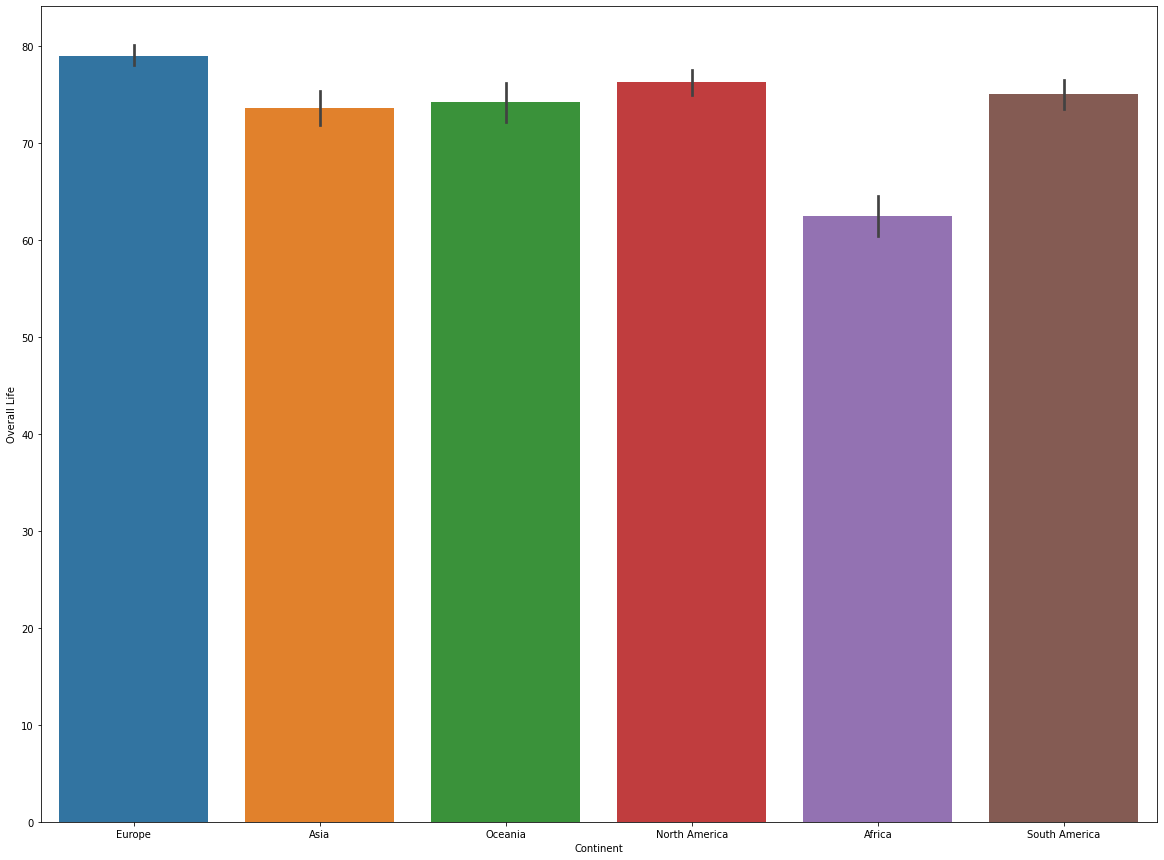

In [142]:
plt.figure(figsize = (20, 15))
sns.barplot(x='Continent', y='Overall Life', data=df)

Europe Memilik Jumlah Overall Life yang paling tinggi diikuti North America, South America, Oceania, Asia dan Africa

### Data Preprocessing

In [143]:
df.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


##### Feature Engineering: Drop Columns

In [144]:
df.Country.unique()

array(['Monaco', 'Japan', 'Singapore', 'Macau; China', 'San Marino',
       'Iceland', 'Hong Kong, China', 'Andorra', 'Switzerland',
       'Guernsey', 'Israel', 'South Korea', 'Luxembourg', 'Australia',
       'Italy', 'Sweden', 'Canada', 'Jersey', 'Liechtenstein',
       'France, metropolitan', 'Norway', 'Spain', 'Austria', 'Anguilla',
       'Bermuda', 'Netherlands', 'Cayman Islands', 'Isle of Man',
       'New Zealand', 'Belgium', 'Finland', 'Ireland', 'Germany',
       'United Kingdom', 'Greece', 'Saint Pierre and Miquelon',
       'Faroe Islands', 'Malta', 'European Union', 'Taiwan',
       'U.S. Virgin Islands', 'Turks and Caicos Islands', 'United States',
       'Wallis and Futuna',
       'Saint Helena, Ascension and Tristan da Cunha', 'Denmark',
       'Gibraltar', 'Puerto Rico', 'Portugal', 'Bahrain', 'Chile', 'Cuba',
       'Cyprus', 'Qatar', 'British Virgin Islands', 'Costa Rica',
       'Czech Republic', 'Panama', 'Albania', 'Slovenia',
       'Dominican Republic', 'Sint 

Kita akan fokus pada Expentancy Life di masing-masing benua sehingga kita drop column Country

In [145]:
df.drop(['Country'], axis=1, inplace=True)

In [146]:
df.drop(['Rank'], axis=1, inplace=True)

In [147]:
df.head()

,Overall Life,Male Life,Female Life,Continent
0,89.5,85.6,93.5,Europe
1,85.0,81.7,88.5,Asia
2,85.0,82.3,87.8,Asia
3,84.5,81.6,87.6,Asia
4,83.3,80.7,86.1,Europe


##### Feature Engineering: PCA

In [148]:
num_cols = df.iloc[:, :-1]
num_cols.head()

,Overall Life,Male Life,Female Life
0,89.5,85.6,93.5
1,85.0,81.7,88.5
2,85.0,82.3,87.8
3,84.5,81.6,87.6
4,83.3,80.7,86.1


In [149]:
scaler = StandardScaler()
num_cols_std = scaler.fit_transform(num_cols)

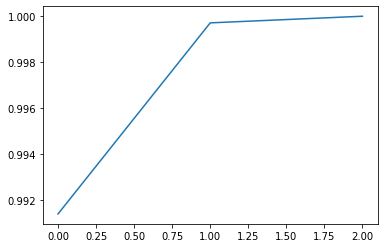

In [150]:
pca = PCA(whiten=True)
pca.fit(num_cols_std)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.figure()
plt.plot(cumsum)

In [151]:
cumsum

array([0.99138841, 0.99971136, 1.        ])

In [152]:
d

1

Dari Korelasi antar numeric data sangat tinggi begitu juga hasil PCA kita bisa reduksi menjadi 1 Dimensi

In [153]:
X1D = PCA(n_components=1).fit_transform(num_cols_std)

##### Feature Engineering: LabelEncoder

In [154]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

df['Continent_Cat'] =  enc.fit_transform(df['Continent'])

### Pendefinisian Model

#### Clustering

Karena data Unsupervised Learning maka kita akan menggunakan algoritma clustering untuk memberikan label pada setiap data. Algoritma clustering yang akan kita gunakan saat ini adalah Kmeans.

In [155]:
df.head()

,Overall Life,Male Life,Female Life,Continent,Continent_Cat
0,89.5,85.6,93.5,Europe,2
1,85.0,81.7,88.5,Asia,1
2,85.0,82.3,87.8,Asia,1
3,84.5,81.6,87.6,Asia,1
4,83.3,80.7,86.1,Europe,2


In [156]:
cat_cols = df[['Continent_Cat']]
cat_cols.head()

,Continent_Cat
0,2
1,1
2,1
3,1
4,2


Text(0, 0.5, 'Inertia')

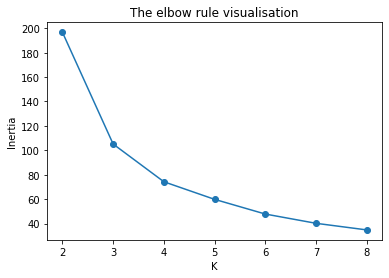

In [157]:
X_reduced = scaler.fit_transform(np.append(X1D, cat_cols, axis=1))
K=[2,3,4,5,6,7,8]
inertia=[KMeans(n_clusters=i).fit(X_reduced).inertia_ for i in K]
plt.title("The elbow rule visualisation")
plt.plot(K,inertia, '-o')
plt.xlabel('K')
plt.ylabel('Inertia')

Hasil Elbow Methods kita belum bisa pastikan jumlah cluster yang optimum, jika dilihat dari Elbow Methods jumlah cluster optimum berada pada K=3 dan K=4 . Selanjutnya kita akan Evaluasi dengan metode Silhouette Score dan Silhouette Plote

Text(0, 0.5, 'Silhouette Score')

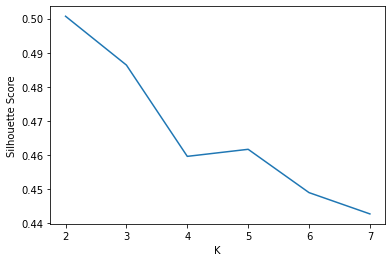

In [158]:
K=range(2, 8)

s_score=[silhouette_score(X_reduced, KMeans(n_clusters=i).fit(X_reduced).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

Hasil Silhouette Score tertinggi adalah di K=3

In [161]:
# Fungsi Plot Silhouette

def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.500668980619903
For n_clusters = 3 The average silhouette_score is : 0.48636840470800824
For n_clusters = 4 The average silhouette_score is : 0.45962814014410674
For n_clusters = 5 The average silhouette_score is : 0.4616956244593627
For n_clusters = 6 The average silhouette_score is : 0.44850348338832163
For n_clusters = 7 The average silhouette_score is : 0.4579064646362211


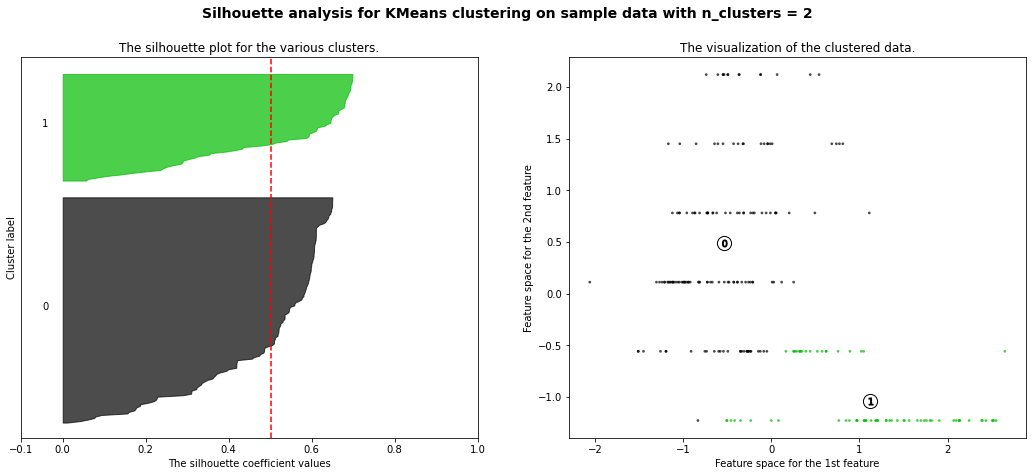

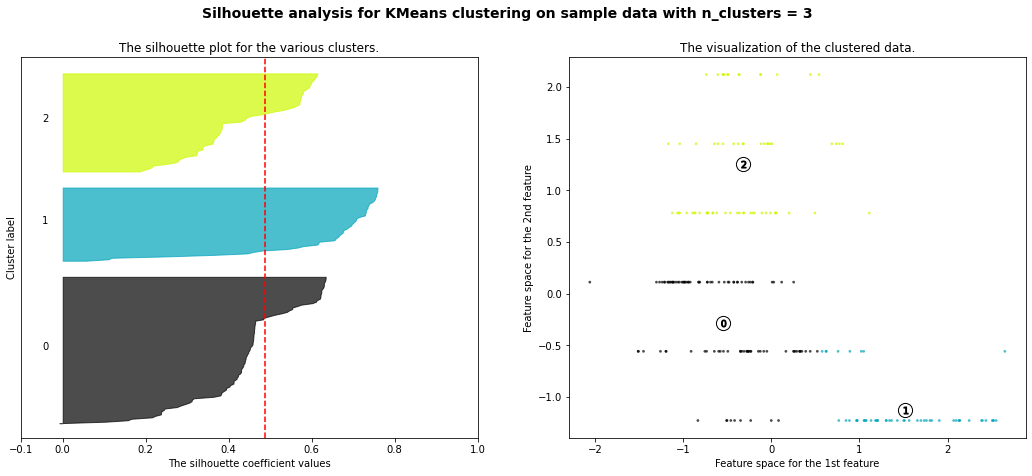

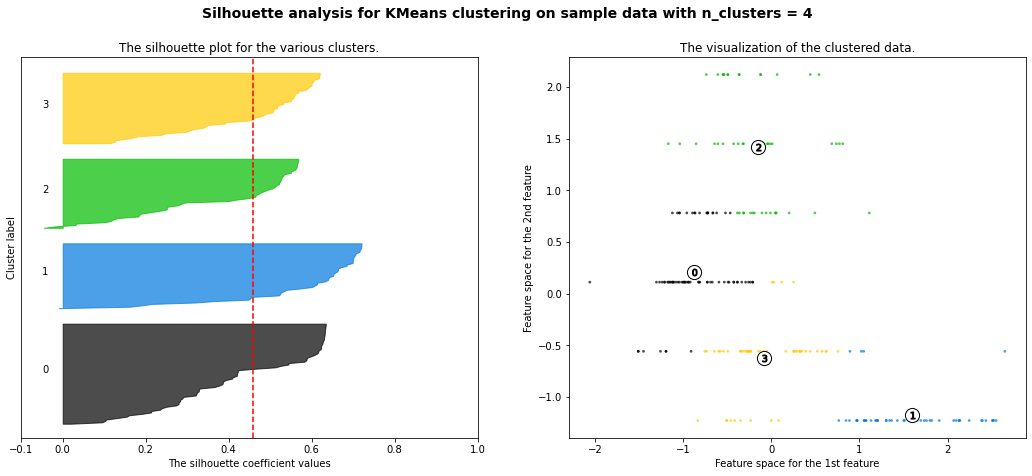

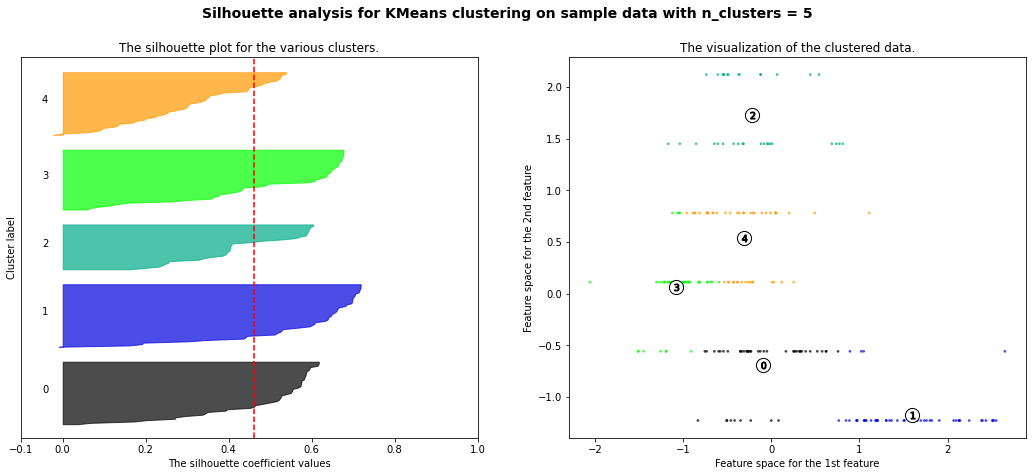

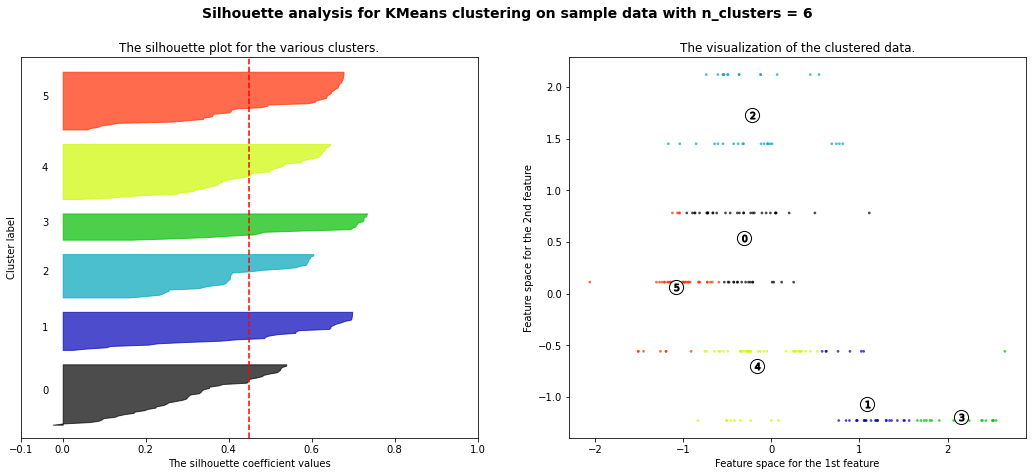

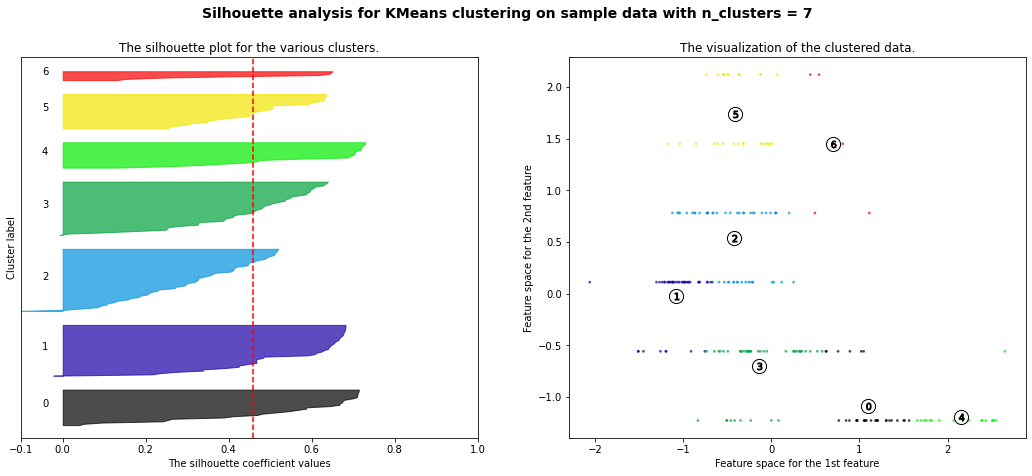

In [162]:
plot_silhouette(K,X_reduced)

Hasil Silhouette Plot secara subjektif dari penulis melihat bahwa jumlah cluster optimum adalah dan n_cluster = 4

**Kesimpulan: Hasil ketiga metode untuk menentukan jumlah cluster optimum adalah n_cluster = 3**


Selanjutnya kita akan gunakan n_cluster = 3 untuk algorithms yang menggunakan jumlah cluster sebagai input parameter

In [163]:
data['Continent'].unique()

array(['Europe', 'Asia', 'Oceania', 'North America', 'Africa',
       'South America'], dtype=object)

##### Algoritma Clustering: Kmeans

Dipilih n_cluster = 4, metode inisialisasi adalah 'k-means++' memilih kluster awal untuk clustering dengan cara yang cerdas untuk mempercepat kekonvergenan, dan algorithm = 'elkan' agar data lebih efisien 

In [164]:
model = KMeans(n_clusters=3, init='k-means++', random_state=0, algorithm='elkan')
y_kmeans = model.fit_predict(X_reduced)

#### Interpretasi Model KMeans

##### 2D PCA Visualization

In [165]:
df['labels'] = y_kmeans + 1
df.head()

,Overall Life,Male Life,Female Life,Continent,Continent_Cat,labels
0,89.5,85.6,93.5,Europe,2,3
1,85.0,81.7,88.5,Asia,1,3
2,85.0,82.3,87.8,Asia,1,3
3,84.5,81.6,87.6,Asia,1,3
4,83.3,80.7,86.1,Europe,2,3


In [166]:
pca_df = pd.DataFrame(data=X_reduced, columns=["x1", "x2"])
pca_df["labels"] = y_kmeans + 1

In [167]:
pca_df

,x1,x2,labels
0,-2.057113,0.112603,3
1,-1.508276,-0.556926,3
2,-1.506921,-0.556926,3
3,-1.448268,-0.556926,3
4,-1.301466,0.112603,3
...,...,...,...
215,2.506791,-1.226455,2
216,2.516932,-1.226455,2
217,2.522011,-1.226455,2
218,2.551085,-1.226455,2


<AxesSubplot:xlabel='x1', ylabel='x2'>

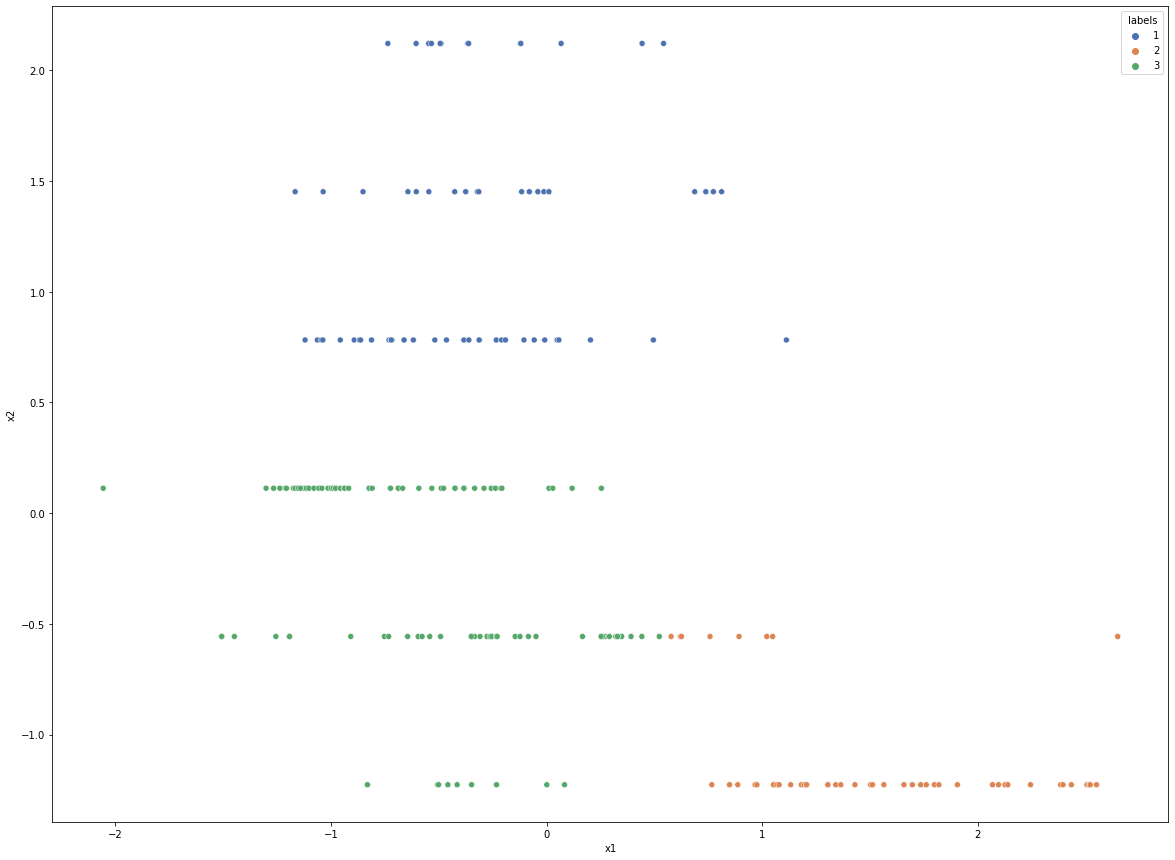

In [168]:
plt.figure(figsize = (20, 15))
sns.scatterplot(data=pca_df, x="x1", y="x2", hue="labels", palette="deep")

In [169]:
df.head()

,Overall Life,Male Life,Female Life,Continent,Continent_Cat,labels
0,89.5,85.6,93.5,Europe,2,3
1,85.0,81.7,88.5,Asia,1,3
2,85.0,82.3,87.8,Asia,1,3
3,84.5,81.6,87.6,Asia,1,3
4,83.3,80.7,86.1,Europe,2,3


In [207]:
cluster1_overall_life_mean = df[df['labels']==1]['Overall Life'].mean()
print("cluster1_overall_life_mean: ", cluster1_overall_life_mean)
cluster2_overall_life_mean = df[df['labels']==2]['Overall Life'].mean()
print("cluster2_overall_life_mean: ", cluster2_overall_life_mean)
cluster3_overall_life_mean = df[df['labels']==3]['Overall Life'].mean()
print("cluster3_overall_life_mean: ", cluster3_overall_life_mean)

cluster1_overall_life_mean:  75.41911764705881
cluster2_overall_life_mean:  60.419607843137264
cluster3_overall_life_mean:  77.25247524752473


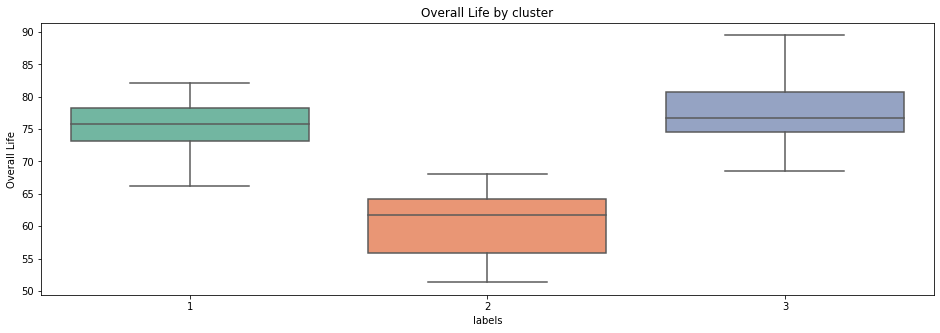

In [170]:
plt.figure(figsize=(16,5))
plt.title(f'Overall Life by cluster')
ax = sns.boxplot(data=df, x='labels', y='Overall Life', palette=PALETTE, showfliers=False)
plt.show()

Cluster 1: Medium Overall Life Expectancy

Cluster 2: Low income Expectancy

Cluster 3: High Overall Life Expectancy

In [197]:
df.head()

,Overall Life,Male Life,Female Life,Continent,Continent_Cat,labels
0,89.5,85.6,93.5,Europe,2,3
1,85.0,81.7,88.5,Asia,1,3
2,85.0,82.3,87.8,Asia,1,3
3,84.5,81.6,87.6,Asia,1,3
4,83.3,80.7,86.1,Europe,2,3


In [208]:
cluster1_male_life_mean = df[df['labels']==1]['Male Life'].mean()
print("cluster1_male_life_mean: ", cluster1_male_life_mean)
cluster2_male_life_mean = df[df['labels']==2]['Male Life'].mean()
print("cluster2_male_life_mean: ", cluster2_male_life_mean)
cluster3_male_life_mean = df[df['labels']==3]['Male Life'].mean()
print("cluster3_male_life_mean: ", cluster3_male_life_mean)

cluster1_male_life_mean:  72.87941176470588
cluster2_male_life_mean:  58.75686274509806
cluster3_male_life_mean:  74.42673267326732


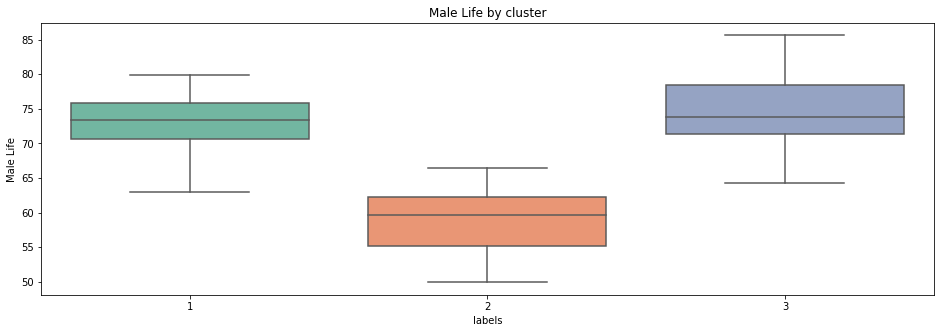

In [171]:
plt.figure(figsize=(16,5))
plt.title(f'Male Life by cluster')
ax = sns.boxplot(data=df, x='labels', y='Male Life', palette=PALETTE, showfliers=False)
plt.show()

Cluster 1: Medium Male Life Expectancy

Cluster 2: Low Male Life Expectancy

Cluster 3: High Male Life Expectancy

In [206]:
cluster1_female_life_mean = df[df['labels']==1]['Female Life'].mean()
print("cluster1_female_life_mean: ", cluster1_female_life_mean)
cluster2_female_life_mean = df[df['labels']==2]['Female Life'].mean()
print("cluster2_female_life_mean: ", cluster2_female_life_mean)
cluster3_female_life_mean = df[df['labels']==3]['Female Life'].mean()
print("cluster3_female_life_mean: ", cluster3_female_life_mean)

cluster1_female_life_mean:  78.04852941176472
cluster2_female_life_mean:  62.17450980392155
cluster3_female_life_mean:  80.15940594059406


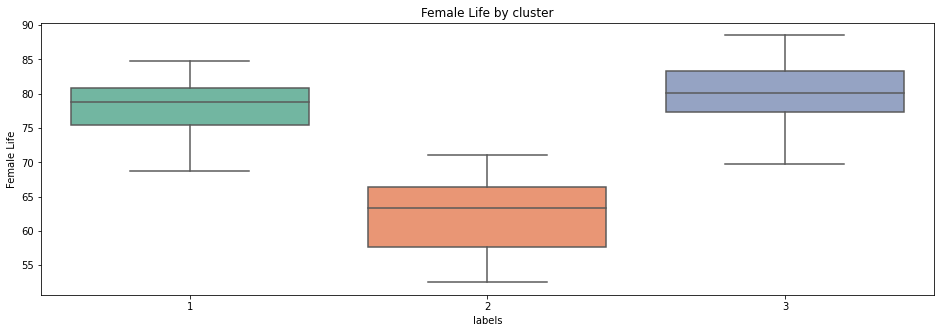

In [172]:
plt.figure(figsize=(16,5))
plt.title(f'Female Life by cluster')
ax = sns.boxplot(data=df, x='labels', y='Female Life', palette=PALETTE, showfliers=False)
plt.show()

Cluster 1: Medium Female Life Expectancy

Cluster 2: Low Female Life Expectancy

Cluster 3: High Female Life Expectancy

Overall Live dengan rata-rata paling tinggi adalah cluster 3, dikuti dengan cluster 0, cluster 1 dan cluster 2

In [187]:
cluster_percontinent = pd.DataFrame(df.groupby(['Continent', 'labels'])['Continent_Cat'].count())
cluster_percontinent

Continent_Cat
Continent     labels               
Africa        2                  43
              3                   9
Asia          2                   8
              3                  41
Europe        3                  51
North America 1                  34
Oceania       1                  20
South America 1                  14

In [190]:
cluster_percontinent = cluster_percontinent.rename(columns={"Continent_Cat": "jumlah"}).reset_index()

In [191]:
cluster_percontinent

,Continent,labels,jumlah
0,Africa,2,43
1,Africa,3,9
2,Asia,2,8
3,Asia,3,41
4,Europe,3,51
5,North America,1,34
6,Oceania,1,20
7,South America,1,14


Text(0.5, 1.0, 'Continent by cluster')

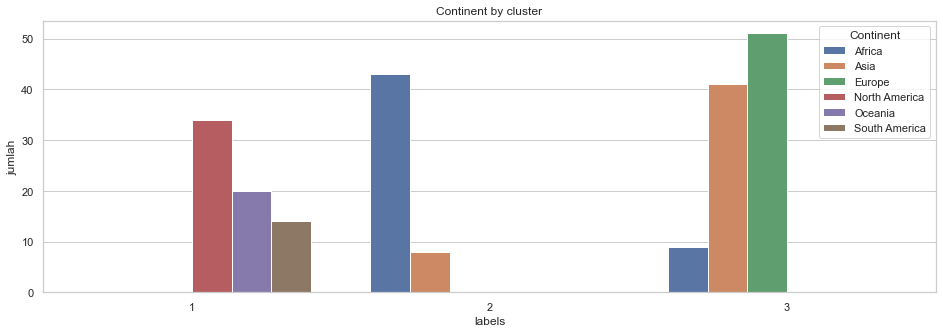

In [244]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x="labels", y="jumlah", hue="Continent", data=cluster_percontinent)
plt.title(f'Continent by cluster')

Cluster 1: North America, Oceania and South America

Cluster 2: Africa and Asia

Cluster 3: Europe, Asia and Africa

In [233]:
cluster1_percontinent = cluster_percontinent[cluster_percontinent['labels']==1]
labels_cluster1 = cluster1_percontinent['Continent'].unique()

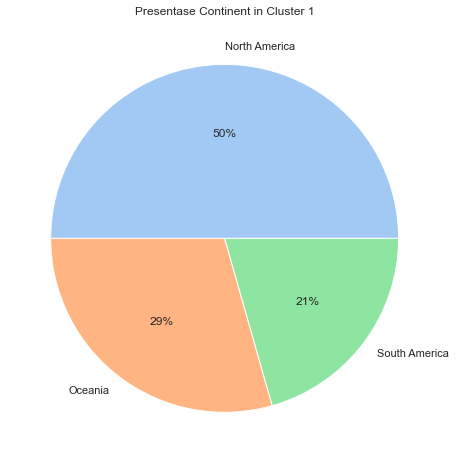

In [234]:
colors = sns.color_palette('pastel')[0:3]
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
plt.pie(cluster1_percontinent['jumlah'], labels= labels_cluster1, colors=colors, autopct='%.0f%%')
plt.title("Presentase Continent in Cluster 1")
plt.show()

Cluster 1: Persentase Continent adalah 50% North America, 29% Oceania dan 21% South America

In [236]:
cluster2_percontinent = cluster_percontinent[cluster_percontinent['labels']==2]
labels_cluster2 = cluster2_percontinent['Continent'].unique()

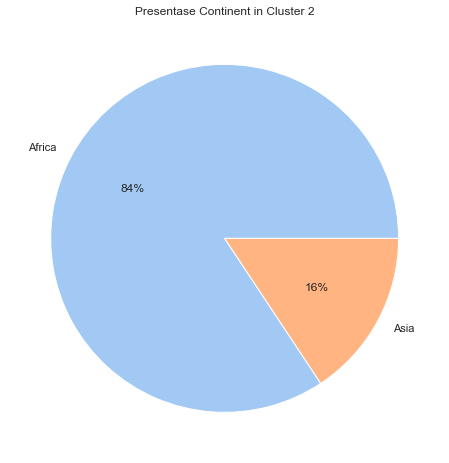

In [237]:
colors = sns.color_palette('pastel')[0:3]
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
plt.pie(cluster2_percontinent['jumlah'], labels= labels_cluster2, colors=colors, autopct='%.0f%%')
plt.title("Presentase Continent in Cluster 2")
plt.show()

Cluster 2: Persentase Continent adalah 84% Africa dan 16% Asia

In [238]:
cluster2_percontinent = cluster_percontinent[cluster_percontinent['labels']==3]
labels_cluster3 = cluster2_percontinent['Continent'].unique()

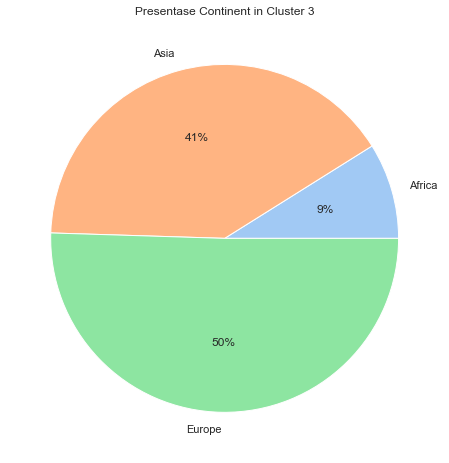

In [239]:
colors = sns.color_palette('pastel')[0:3]
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))
plt.pie(cluster2_percontinent['jumlah'], labels= labels_cluster3, colors=colors, autopct='%.0f%%')
plt.title("Presentase Continent in Cluster 3")
plt.show()

Cluster 3: Persentase Continent adalah 50% Europe, 41% Asia dan 9% Africa

**Results**

Berdasrakan features overall life dan features Continent kita bisa simpulkan: 

*Cluster: 1*
> Cluster dengan Medium Life Expectancy dengan jumlah proporsi terbanyak adalah berada pada Continent North America, Oceania, dan South America secara berurutan 

*Cluster: 2*
>  Cluster dengan Low Life Expectancy dengan jumlah proporsi terbanyak adalah berada pada Continent Afrika dan sebagian kecil di Asia

*Cluster: 3*
> Cluster dengan High Life Expectancy dengan jumlah proporsi terbanyak adalah berada pada Continent Eropa, Asia, dan sebagian kecil di Afrika

#### Classification

Kita akan menguji features dan label kita hasil algoritma clustering KMeans dengan menggunakan algoritma clasification yaitu Gaussian Naive Bayes karena untuk kasus multi label classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Split train test data
# Take only 5% as test data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_kmeans, test_size=0.2, random_state = 0)

gnb = GaussianNB()

### Pelatihan Model

In [ ]:
model_gnb = gnb.fit(X_train, y_train)

### Evaluasi Model

In [ ]:
gnb_predictions = gnb.predict(X_test)

In [ ]:
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

Dengan Menggunakan Gaussian Naive Bayes diadapat accuracy score 0.95

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions))

### Model Inference

In [ ]:
# Check data train sebaga role model untuk prediksi data baru
X_train[0]

In [ ]:
X_pred = [[ 1,  0.5, -1],
[ -1.4,  1.23, -1]]

In [ ]:
print("Prediksi Model Gaussian Naive Bayes: ", gnb.predict(X_pred))
print("-"*100)

### Pengambilan Kesimpulan

1. Jumlah Cluster yang diplih adalah 4 cluster setelah dilakukan reduksi dimensi. Hasil dari accuracy score 95% dengan menggunakan algoritma Naive Bayes artinya model kita sangat baik untuk dijadikan prediksi namun harus kita perlu melakukan evaluasi lagi dengan menggunakan hyperparameter Tuning untuk mengurangi overfitting

2. Dari Model Inference data Prediksi kita diperoleh data kita berada pada cluster 1 dan cluster 2

3. Cluster dengan Expectancy Life paling tinggi berda pada benua North America, diikuti eropa, Oceania, South America sedangkan Expectancy Life paling rendah adalah benua Africa